# Generalization

Generalization refers to your model's ability to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.

(Early stopping, Dropout, Cross-validation, L1 regularization, L2 regularization, ...)
<br><br>
### Overfitting

Overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably".

![overfitting](./overfitting.png)

<div align="right">
https://en.wikipedia.org/wiki/Overfitting
    <div>

## Early stopping

Early stopping is a method to complete network training using a validation set prior to overfitting. 


![early_stopping](./early_stopping.png)

Training error continues to decrease as learning proceeds and validation error begins to increase again. Dashed line points where we need to stop learning.



## Dropout
In dropout method, each unit in the network, is chosen with probability p and training is only implemented with the selected units. The reason that the
dropout algorithm is effective for a generalization is that it can be considered as a bagging ensemble algorithm. 

![dropout](./dropout.png)

<div align="right">
http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf
    <div>

## Cross-validation
In machine learning, the raw data set is commonly divided into three parts: training set, validation set and test set to avoid overfitting. However, it may be problematic if the total amounts of data being possessed are not sufficient. It is due to the performance of model can vary greatly depending on which data is actually being contained in each of training set, validation set and test set. To improve this issue, the method of k-fold cross validation is widely used, which is one of the types of resampling methods.

![cross_validation](./cv.png)

<div align="right">
https://www.kaggle.com/dansbecker/cross-validation
    <div>

# Load packages

In [1]:
import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot, plot_model
from IPython.display import SVG

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from jupyterthemes import jtplot
jtplot.style()

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Load mnist data

In [2]:
# load mnist data and split between train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

# Explore the data

In [3]:
# shape of mnist data

print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


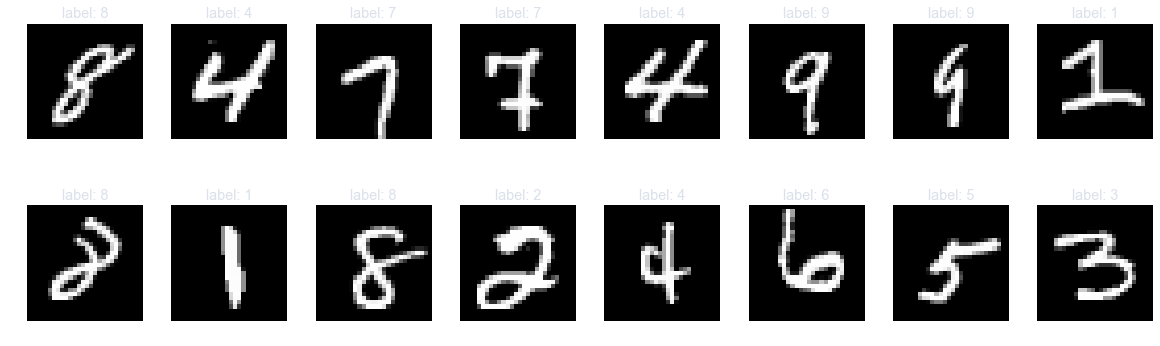

In [4]:
# sample images and correspoding label

def plot_images(number_of_samples, data_set = x_train):
    
    if np.array_equal(data_set, x_train):
        label = y_train
    else:
        label = y_test
        
    number_of_samples = number_of_samples//8*8 
    fig, ax = plt.subplots(number_of_samples//8, 8, figsize=(16,5), constrained_layout = True)
    num = np.random.choice(len(data_set), number_of_samples, replace=False)
    
    for i,j in enumerate(num):
        ax[i//8, i%8].imshow(data_set[j], cmap='gray')
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(f"label: {label[j]}")
    plt.show()    
    
plot_images(16, x_train)

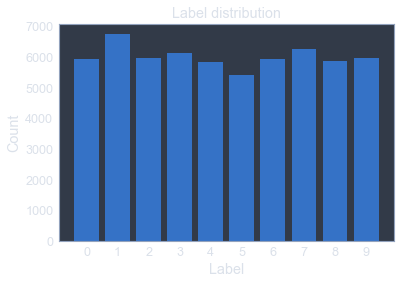

In [5]:
# plot label distribution of training set

plt.title('Label distribution')
plt.bar(range(10), np.bincount(y_train))
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(10))
plt.grid(False)

# Data preprocessing

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train)
# test_size, stratify

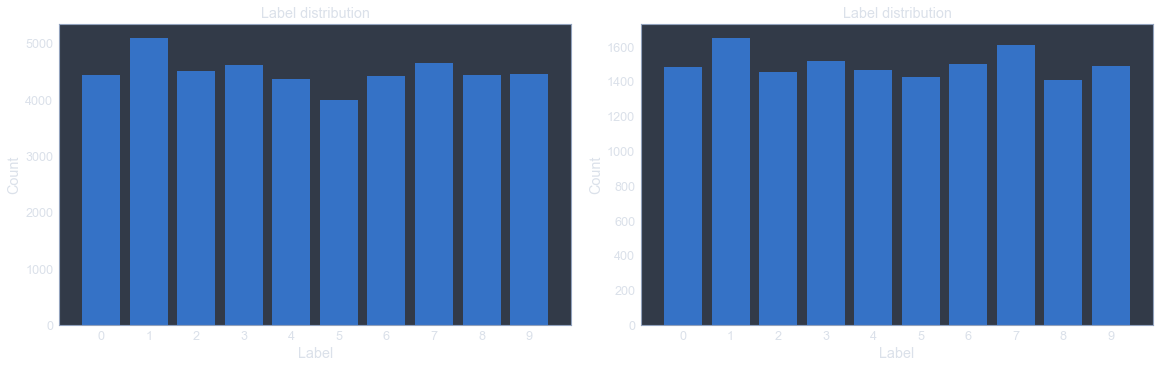

In [7]:
# plot label distributions of training set and validation set
fig, ax = plt.subplots(1,2, figsize=(16,5), constrained_layout = True)

ax[0].bar(range(10), np.bincount(y_train))
ax[0].set_title('Label distribution')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Count')
ax[0].set_xticks(range(10))
ax[0].grid(False)

ax[1].bar(range(10), np.bincount(y_valid))
ax[1].set_title('Label distribution')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Count')
ax[1].set_xticks(range(10))
ax[1].grid(False)

In [8]:
# rescale the image data 
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_valid /= 255
x_test /= 255

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

#  reshape
x_train = x_train.reshape(x_train.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Set parameters

In [9]:
batch_size = 128
epochs = 5

# Model

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics=['accuracy'])

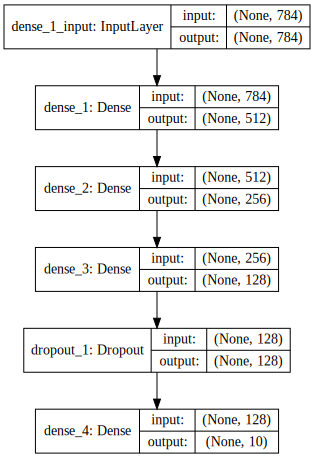

In [11]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Training and prediction

In [12]:
# training 
train_model = model.fit(x_train, y_train, epochs=20, verbose=2, validation_data=(x_valid, y_valid))

Train on 45000 samples, validate on 15000 samples
Epoch 1/20
 - 8s - loss: 0.7246 - acc: 0.7957 - val_loss: 0.3073 - val_acc: 0.9107
Epoch 2/20
 - 8s - loss: 0.3149 - acc: 0.9099 - val_loss: 0.2312 - val_acc: 0.9315
Epoch 3/20
 - 7s - loss: 0.2479 - acc: 0.9304 - val_loss: 0.2037 - val_acc: 0.9369
Epoch 4/20
 - 6s - loss: 0.2056 - acc: 0.9426 - val_loss: 0.1748 - val_acc: 0.9464
Epoch 5/20
 - 7s - loss: 0.1797 - acc: 0.9490 - val_loss: 0.1499 - val_acc: 0.9547
Epoch 6/20
 - 6s - loss: 0.1569 - acc: 0.9552 - val_loss: 0.1451 - val_acc: 0.9552
Epoch 7/20
 - 6s - loss: 0.1384 - acc: 0.9606 - val_loss: 0.1327 - val_acc: 0.9610
Epoch 8/20
 - 6s - loss: 0.1245 - acc: 0.9642 - val_loss: 0.1189 - val_acc: 0.9635
Epoch 9/20
 - 6s - loss: 0.1142 - acc: 0.9670 - val_loss: 0.1115 - val_acc: 0.9659
Epoch 10/20
 - 6s - loss: 0.1025 - acc: 0.9701 - val_loss: 0.1048 - val_acc: 0.9670
Epoch 11/20
 - 6s - loss: 0.0945 - acc: 0.9729 - val_loss: 0.1023 - val_acc: 0.9681
Epoch 12/20
 - 6s - loss: 0.0867 - 

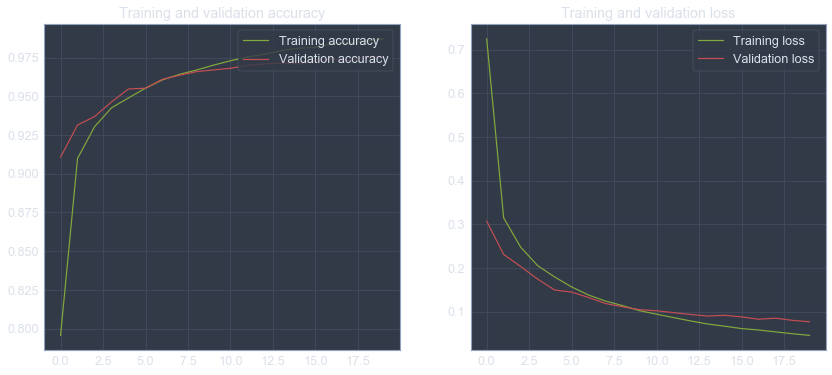

In [13]:
# plot results
def plot_result(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    fig, ax = plt.subplots(1,2, figsize=(14,6))
    
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend(loc=1)
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend(loc=1)
    plt.show()
    
plot_result(train_model)

In [14]:
# prediction
prediction = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', prediction[0])
print('Test accuracy:', prediction[1])

Test loss: 0.07209727234221064
Test accuracy: 0.9773


# Visualize model

In [15]:
# plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB')

# # Arguments
# #         model: A Keras model instance
# #         to_file: File name of the plot image.
# #         show_shapes: whether to display shape information.
# #         show_layer_names: whether to display layer names.
# #         rankdir: `rankdir` argument passed to PyDot,
# #             a string specifying the format of the plot:
# #             'TB' creates a vertical plot;
# #             'LR' creates a horizontal plot.